In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
"""""
общая сумма транзакций по каждой из trx_category
общая сумма транзакций по каждой из trx_category по дням
общая сумма транзакций по каждой из trx_category по месяцам
общая сумма транзакций по каждой из trx_category в будни и выходные
общая сумма транзакций по каждой из trx_category в будни и выходные по времени суток (утро. день. ночь)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-2-fa7ae4623a47>, line 6)

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [3]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [212]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ MB


In [4]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [5]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [6]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  394732
Total transactions in test dataset:  95781


In [7]:
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))

Total transactions in train dataset:  394732


In [8]:
transactions_train.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
5,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,380.0,POS,0,0.0
6,01/10/2017,1,5814,NaN,810,10OCT17:00:00:00,378.0,POS,0,0.0
7,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,199.0,POS,0,0.0
8,01/10/2017,1,5814,NaN,810,11OCT17:00:00:00,400.0,POS,0,0.0
9,01/07/2017,1,5411,NaN,810,26JUL17:00:00:00,598.0,POS,0,0.0


In [12]:
transactions_train2=transactions_train[['cl_id','MCC','amount']][transactions_train.MCC==5411]

In [13]:
transactions_train2.head()

,cl_id,MCC,amount
9,1,5411,598.00
19,1,5411,32.73
71,1,5411,10.50
73,1,5411,240.00
74,1,5411,9575.94


In [23]:
#Популярные MCC
transactions_train["MCC"].value_counts().head(10)

5411    98687
6011    43385
5814    33577
5812    24189
5499    21533
5541    15795
5912    14933
5999    10437
6012     8188
5921     6583
Name: MCC, dtype: int64

In [158]:
#Популярные категории
transactions_train["trx_category"].value_counts()

POS               335463
DEPOSIT            17111
WD_ATM_ROS         15231
WD_ATM_PARTNER      7961
C2C_IN              5929
WD_ATM_OTHER        5508
C2C_OUT             4326
BACK_TRX            2186
CAT                  994
CASH_ADV              23
Name: trx_category, dtype: int64

## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Обязательная часть**: на большом количестве фичей применить Lasso регрессию и посмотреть, какие переменные получают 0 в качестве коэффициентов
6. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
7. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

In [159]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack().fillna(0).reset_index()

In [160]:
aggregated_dataset

cl_id amount                                           ...             \
               sum                                           ...              
MCC            742  763  780   1520 1711 1731 1750 1799 2741 ...  8699 8911   
0         0    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
1         1    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
2         5    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
3         9    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4        10    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
5        11    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
6        14    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
7        20    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
8        21    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
9        22    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
10       23    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
11       24    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
12       25    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
13       28    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
14       29    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
15       31    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
16       32    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
17       35    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
18       38    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
19       39    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
20       41    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
21       42    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
22       46    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
23       48    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
24       49    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
25       50    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
26       52    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
27       54    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
28       55    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
29       56    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
...     ...    ...  ...  ...    ...  ...  ...  ...  ...  ... ...   ...  ...   
4970  10162    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4971  10163    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4972  10164    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4973  10166    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4974  10167    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4975  10168    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4976  10169    0.0  0.0  0.0  640.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4977  10170    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4978  10171    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4979  10175    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4980  10176    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4981  10177    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4982  10180    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4983  10181    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4984  10184    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4985  10185    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
4986  10186    0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0 

In [142]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') ) 
    tmp_df = dataset.groupby(['cl_id','day_of_transaction'])['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [old_col for old_col in tmp_df.columns.tolist() if old_col in dataset['day_of_transaction'].unique()]
    tmp_df.rename(columns={old_col: 'day_' + old_col for old_col in old_columns}, inplace=True)
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H') ) 
    return dataset.groupby(['cl_id','hour_of_transaction'])['hour_of_transaction'].size().unstack().fillna(0).reset_index()


In [247]:
def transaction_by_month_count(dataset):
    dataset['month_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%M') ) 
    return dataset.groupby(['cl_id','month_of_transaction'])['month_of_transaction'].size().unstack().fillna(0).reset_index()

In [59]:
raw_df['day_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') )

In [73]:
raw_df['day_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') )
#определяем будни
raw_df['budvyh_transaction'] = raw_df['day_of_transaction'].apply( lambda x: 1 if (int(x)==1 or int(x)==2 or int(x)==3 or int(x)==4 or int(x)==5) else 0 )

In [78]:
raw_df_grouped_bv = raw_df[
    ['cl_id', 'amount', 'budvyh_transaction']
].groupby(['cl_id', 'budvyh_transaction']).agg(['sum'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset3 = raw_df_grouped_bv.unstack().reset_index()

In [81]:
aggregated_dataset3.columns=['cl_id','v','b']
aggregated_dataset3.head()

,cl_id,v,b
0,0,7054.00,57329.00
1,1,174390.59,93187.45
2,5,130274.72,416094.41
3,9,2906.09,846409.00
4,10,807437.30,316906.69


In [74]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,day_of_transaction,budvyh_transaction
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,6,0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,4,1
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,2,1
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,6,0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,2,1


In [220]:
transaction_by_day_count(raw_df)

day_of_transaction,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1,1,7.0,20.0,20.0,16.0,16.0,10.0,15.0
2,5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
3,9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
4,10,74.0,35.0,62.0,68.0,65.0,57.0,102.0
5,11,28.0,29.0,30.0,25.0,40.0,40.0,25.0
6,14,14.0,22.0,12.0,15.0,30.0,39.0,4.0
7,20,6.0,10.0,15.0,13.0,22.0,7.0,4.0
8,21,22.0,6.0,13.0,18.0,16.0,36.0,13.0
9,22,15.0,6.0,0.0,1.0,12.0,11.0,14.0


In [221]:
raw_df_grouped.head()

amount      
                sum count
cl_id MCC                
0     5200   5023.0     1
      5411   2031.0     1
      5921    767.0     1
      6011  20000.0     1
      6012  36562.0     1

In [163]:
raw_df_grouped2 = raw_df[
    ['cl_id','amount']
][(raw_df.MCC==5411)|(raw_df.MCC==6011)|(raw_df.MCC==5814)|(raw_df.MCC==5812)|(raw_df.MCC==5499)].groupby(['cl_id']).agg(['sum','mean']).reset_index()

In [164]:
raw_df_grouped2

cl_id      amount               
                    sum           mean
0         0    22031.00   11015.500000
1         1   245743.44    3191.473247
2         5   263678.10    4119.970313
3         9   540039.00   67504.875000
4        10   923474.38    4504.753073
5        11   230936.02    1685.664380
6        14    87789.02     975.433556
7        20   229105.49   12728.082778
8        21   104648.49    1804.284310
9        22   141851.82    6447.810000
10       23   164216.80    6316.030769
11       24     2954.99     738.747500
12       25  1340600.00  148955.555556
13       28    79597.45    1941.401220
14       29   108240.78    1021.139434
15       31   101137.10    3064.760606
16       32    84521.75     949.682584
17       35   204091.53    2082.566633
18       38    53558.00    8926.333333
19       39   463288.24    9651.838333
20       41   151955.27    2813.986481
21       42   424442.43    2652.765188
22       46   240043.86    6858.396000
23       48   145738.23    2208.155000
24       49   152364.26    4117.952973
25       50    58710.60    2258.100000
26       52   215243.50   35873.916667
27       54    70926.24     738.815000
28       55   112212.11    1626.262464
29       56   401583.62   13847.711034
...     ...         ...            ...
4853  10161    23250.21    1367.659412
4854  10162    94257.31    1923.618571
4855  10163   300019.88    3409.316818
4856  10164    71800.00    7180.000000
4857  10166    47674.36    1702.655714
4858  10167   433540.65    4712.398370
4859  10168   236441.85   19703.487500
4860  10169   294496.99    6265.893404
4861  10170    91000.00   15166.666667
4862  10171   230957.25    4913.984043
4863  10175  1474000.00  122833.333333
4864  10176     3900.00     650.000000
4865  10177   208629.77    2938.447465
4866  10180   217100.00   31014.285714
4867  10181   214042.84    2184.110612
4868  10184   445000.00   37083.333333
4869  10185   155907.60    4585.517647
4870  10186    91017.56     875.168846
4871  10188    95246.50   15874.416667
4872  10190   941620.00  156936.666667
4873  10192    18644.32    3728.864000
4874  10193   154000.00   22000.000000
4875  10203    59491.60    1322.035556
4876  10206   179879.69    6918.449615
4877  10207  1828403.86    9623.178211
4878  10210    89183.86    1158.231948
4879  10212    99000.00   14142.857143
4880  10213   499319.52    9246.657778
4881  10214    44598.36    1311.716471
4882  10215    51678.00    3229.875000

[4883 rows x 3 columns]

In [166]:
raw_df_grouped2.columns=['cl_id','amount_s','amount_m']

In [168]:
raw_df_grouped2.head()

,cl_id,amount_s,amount_m
0,0,22031.00,11015.500000
1,1,245743.44,3191.473247
2,5,263678.10,4119.970313
3,9,540039.00,67504.875000
4,10,923474.38,4504.753073


In [19]:
raw_df_grouped.unstack()

amount                                                ...              \
         sum                                                ...  count        
MCC     742  763  780    1520 1711 1731 1750 1799 2741 2842 ...   8699 8911   
cl_id                                                       ...               
0        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
1        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
5        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
9        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
11       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
14       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
20       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
21       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
22       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
23       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
24       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
25       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
28       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
29       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
31       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
32       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
35       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
38       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
39       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
41       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
42       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
46       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
48       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
49       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
50       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
52       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
54       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
55       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
56       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
...      ...  ...  ...    ...  ...  ...  ...  ...  ...  ... ...    ...  ...   
10162    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10163    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10164    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10166    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10167    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10168    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10169    NaN  NaN  NaN  640.0  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10170    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10171    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10175    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10176    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10177    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10180    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10181    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10184    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10185    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  

In [68]:
transaction_by_hour_count(raw_df)

hour_of_transaction,cl_id,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,5,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
3,9,7.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
4,10,299.0,3.0,6.0,8.0,14.0,9.0,19.0,17.0,13.0,...,6.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
5,11,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
6,14,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,20,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,21,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
9,22,39.0,0.0,3.0,3.0,0.0,1.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
ttt=transaction_by_hour_count(raw_df)

In [29]:
aaa=ttt.head(5)

In [226]:
joined = ttt.merge(raw_df_grouped2, on='cl_id')

C:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:862: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  self.right = self.right.drop(right_drop, axis=1)


In [227]:
joined.columns=['cl_id','k00','k01','k02','k03','k04','k05','k06','k07','k08','k09','k10',
               'k11','k12','k13','k14','k15','k16','k17','k18','k19','k20','k21','k22','k23','summ','meann']

In [148]:
joined

,cl_id,00,01,02,03,04,05,06,07,08,...,16,17,18,19,20,21,22,23,summ,meann
0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64383.00,12876.600000
1,1,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,267578.04,2572.865769
2,5,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0,546369.13,3847.669930
3,9,7.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,849315.09,21777.310000
4,10,299.0,3.0,6.0,8.0,14.0,9.0,19.0,17.0,13.0,...,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1124343.99,2428.388747
5,11,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,427747.14,1971.184977
6,14,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,448690.17,3299.192426
7,20,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,437308.09,5679.325844
8,21,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,338881.65,2732.916532
9,22,39.0,0.0,3.0,3.0,0.0,1.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249767.00,4233.338983


In [157]:
joined2=joined[['summ','meann']]

In [200]:
joined=joined[['summ','00','01']]

In [201]:
joined.columns=['summ','hh','kk']

In [228]:
_iteration_cols = joined.columns.drop('summ')

In [229]:
joined.columns.drop('summ')

Index(['cl_id', 'k00', 'k01', 'k02', 'k03', 'k04', 'k05', 'k06', 'k07', 'k08',
       'k09', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18',
       'k19', 'k20', 'k21', 'k22', 'k23', 'meann'],
      dtype='object')

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
def get_formula(_cols):
    return 'summ ~ ' + " + ".join(_cols)

In [51]:
get_formula(_iteration_cols)

'summ ~ cl_id + k5411 + k5499 + k5812 + k5814 + k6011'

In [233]:
smf.ols(get_formula(_iteration_cols), joined).fit()

In [234]:
lm = smf.ols(get_formula(_iteration_cols), joined).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 952481.610403
R^2: 0.540108479262


In [183]:
ddd=transaction_by_day_count(raw_df)

In [184]:
joined2 = ddd.merge(raw_df_grouped2, on='cl_id')

C:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


KeyError: 'cl_id'

In [239]:
joined2.columns=['cl_id','day_0','day_1','day_2','day_3','day_4','day_5','day_6','summ','meann']

In [240]:
_iteration_cols = joined2.columns.drop('summ')

In [241]:
smf.ols(get_formula(_iteration_cols), joined2).fit()

In [242]:
lm = smf.ols(get_formula(_iteration_cols), joined2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 970281.921174
R^2: 0.52275863166


In [61]:
ggg = raw_df[
    ['cl_id', 'amount', 'MCC']
]

In [52]:
ggg.head()

,cl_id,amount,MCC
0,0,5023.0,5200
1,0,20000.0,6011
2,0,767.0,5921
3,0,2031.0,5411
4,0,36562.0,6012


In [201]:
uuu=raw_df[['cl_id','target_flag']].groupby('cl_id').agg(['mean']).reset_index()

In [202]:
uuu.columns=['cl_id','target_flag']

In [45]:
uuu.head()

,cl_id,target_flag
0,0,0
1,1,0
2,5,1
3,9,0
4,10,0


In [245]:
raw_df['day_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') )

In [251]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,day_of_transaction,hour_of_transaction,month_of_transaction
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,6,00,Oct
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,4,12,Oct
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,2,00,Dec
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,6,00,Oct
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,2,13,Oct


In [250]:
raw_df['month_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%b') )

In [273]:
test_raw_df=raw_df[['MCC','trx_category']].groupby('trx_category').sum()

In [274]:
test_raw_df.head()

,MCC
trx_category,
BACK_TRX,14780892
C2C_IN,39013700
C2C_OUT,30404714
CASH_ADV,204340
CAT,6081834


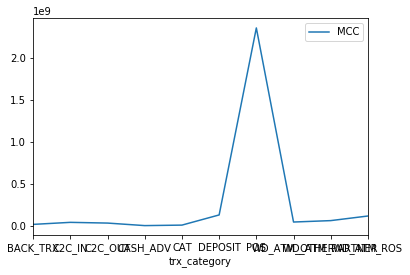

In [275]:
test_raw_df.plot()

In [179]:
raw_df_grouped2 = raw_df[
    ['cl_id', 'amount']
][(raw_df.MCC==5411)|(raw_df.MCC==6011)|(raw_df.MCC==5814)|(raw_df.MCC==5812)|(raw_df.MCC==5499)].groupby(['cl_id']).agg(['mean'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset2 = raw_df_grouped2.unstack().fillna(0).reset_index()


In [176]:
5411    98687
6011    43385
5814    33577
5812    24189
5499    21533
5541    15795
5912    14933
5999    10437
6012     8188
5921 

SyntaxError: invalid syntax (<ipython-input-176-2d2a9309d364>, line 1)

In [182]:
raw_df_grouped2.reset_index()

,cl_id,amount
,,mean
0,0,11015.500000
1,1,3191.473247
2,5,4119.970313
3,9,67504.875000
4,10,4504.753073
5,11,1685.664380
6,14,975.433556
7,20,12728.082778
8,21,1804.284310


In [38]:
aggregated_dataset2.columns=['cl_id','k5411','k5499','k5812','k5814','k6011']

In [39]:
aggregated_dataset2.head()

,cl_id,k5411,k5499,k5812,k5814,k6011
0,0,2031.00,0.00,0.00,0.00,20000.0
1,1,14629.46,492.80,3180.01,82441.17,145000.0
2,5,44925.40,7196.70,3309.00,247.00,208000.0
3,9,39.00,0.00,0.00,0.00,540000.0
4,10,53920.36,13225.02,319.00,2010.00,854000.0


In [95]:
agr2=aggregated_dataset4.merge(uuu, on='cl_id')

C:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [96]:
agr2.head()

,cl_id,"(cl_id, , )","(amount, sum, BACK_TRX)","(amount, sum, C2C_IN)","(amount, sum, C2C_OUT)","(amount, sum, CASH_ADV)","(amount, sum, CAT)","(amount, sum, DEPOSIT)","(amount, sum, POS)","(amount, sum, WD_ATM_OTHER)","(amount, sum, WD_ATM_PARTNER)","(amount, sum, WD_ATM_ROS)",target_flag
0,0,0,0.0,0.0,36562.00,0.0,0.00,20000.0,7821.00,0.0,0.0,0.0,0
1,1,1,0.0,0.0,0.00,0.0,0.00,95000.0,122578.04,0.0,0.0,50000.0,0
2,5,5,13990.0,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0,1
3,9,9,0.0,296950.0,0.00,0.0,0.00,5000.0,12365.09,0.0,100000.0,435000.0,0
4,10,10,0.0,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0,0


In [84]:
_iteration_cols = agr2.columns.drop('target_flag')

In [85]:
def get_formula(_cols):
    return 'target_flag ~ ' + " + ".join(_cols)

In [86]:
smf.ols(get_formula(_iteration_cols), agr2).fit()

In [87]:
lm = smf.ols(get_formula(_iteration_cols), agr2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.45303046218
R^2: 0.159737340524


In [117]:
raw_df_grouped4 = raw_df[
    ['cl_id', 'amount', 'trx_category']
].groupby(['cl_id', 'trx_category']).agg(['sum'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset4 = raw_df_grouped4.unstack().fillna(0).reset_index()

In [118]:
aggregated_dataset4.columns=['cl_id','BACK_TRX','C2C_IN','C2C_OUT','CASH_ADV','CAT','DEPOSIT','POS','WD_ATM_OTHER','WD_ATM_PARTNER','WD_ATM_ROS']

In [133]:
agr2=aggregated_dataset4.merge(uuu, on='cl_id')

In [105]:
agr2.columns.drop('cl_id')

Index(['BACK_TRX', 'C2C_IN', 'C2C_OUT', 'CASH_ADV', 'CAT', 'DEPOSIT', 'POS',
       'WD_ATM_OTHER', 'WD_ATM_PARTNER', 'WD_ATM_ROS', 'target_flag'],
      dtype='object')

In [120]:
agr2=agr2[['BACK_TRX','C2C_IN','C2C_OUT','CASH_ADV','CAT','DEPOSIT','POS','WD_ATM_OTHER','WD_ATM_PARTNER','WD_ATM_ROS','target_flag']]

In [121]:
agr2.head()

,BACK_TRX,C2C_IN,C2C_OUT,CASH_ADV,CAT,DEPOSIT,POS,WD_ATM_OTHER,WD_ATM_PARTNER,WD_ATM_ROS,target_flag
0,0.0,0.0,36562.00,0.0,0.00,20000.0,7821.00,0.0,0.0,0.0,0
1,0.0,0.0,0.00,0.0,0.00,95000.0,122578.04,0.0,0.0,50000.0,0
2,13990.0,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0,1
3,0.0,296950.0,0.00,0.0,0.00,5000.0,12365.09,0.0,100000.0,435000.0,0
4,0.0,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0,0


In [122]:
_iteration_cols = agr2.columns.drop('target_flag')

In [123]:
def get_formula(_cols):
    return 'target_flag ~ ' + " + ".join(_cols)

In [124]:
lm = smf.ols(get_formula(_iteration_cols), agr2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.494836155246
R^2: 0.0092479623219


In [125]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5366,0.009,61.140,0.000,0.519,0.554
BACK_TRX,-4.734e-07,2.19e-07,-2.162,0.031,-9.03e-07,-4.41e-08
C2C_IN,2.899e-08,9.83e-08,0.295,0.768,-1.64e-07,2.22e-07
C2C_OUT,3.324e-07,1e-07,3.316,0.001,1.36e-07,5.29e-07
CASH_ADV,-6.832e-07,1.2e-06,-0.570,0.569,-3.03e-06,1.67e-06
CAT,2.237e-07,1.17e-07,1.910,0.056,-5.9e-09,4.53e-07
DEPOSIT,4.201e-08,3.72e-08,1.129,0.259,-3.1e-08,1.15e-07
POS,2.69e-08,7.82e-09,3.440,0.001,1.16e-08,4.22e-08
WD_ATM_OTHER,4.338e-08,2.99e-08,1.450,0.147,-1.53e-08,1.02e-07
WD_ATM_PARTNER,-4.741e-08,2.91e-08,-1.630,0.103,-1.04e-07,9.6e-09


In [126]:
agr2=agr2[['BACK_TRX','C2C_OUT','CAT','POS','WD_ATM_OTHER','WD_ATM_PARTNER','WD_ATM_ROS','target_flag']]

In [127]:
_iteration_cols = agr2.columns.drop('target_flag')
lm = smf.ols(get_formula(_iteration_cols), agr2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.49491805576
R^2: 0.00891997571644


In [128]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5409,0.008,69.164,0.000,0.526,0.556
BACK_TRX,-4.604e-07,2.15e-07,-2.139,0.032,-8.82e-07,-3.84e-08
C2C_OUT,3.413e-07,9.87e-08,3.457,0.001,1.48e-07,5.35e-07
CAT,2.262e-07,1.17e-07,1.933,0.053,-3.24e-09,4.56e-07
POS,2.716e-08,7.81e-09,3.475,0.001,1.18e-08,4.25e-08
WD_ATM_OTHER,4.194e-08,2.97e-08,1.411,0.158,-1.63e-08,1e-07
WD_ATM_PARTNER,-4.91e-08,2.9e-08,-1.691,0.091,-1.06e-07,7.82e-09
WD_ATM_ROS,3.626e-08,1.66e-08,2.180,0.029,3.65e-09,6.89e-08


In [134]:
agr2=agr2[['C2C_OUT','POS','target_flag']]

In [135]:
_iteration_cols = agr2.columns.drop('target_flag')
lm = smf.ols(get_formula(_iteration_cols), agr2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.495763677908
R^2: 0.00553034308894


In [137]:
agr2['C2C_OUT']=(agr2['C2C_OUT']-agr2['C2C_OUT'].mean())/agr2['C2C_OUT'].std()
agr2['POS']=(agr2['POS']-agr2['POS'].mean())/agr2['POS'].std()

In [138]:
_iteration_cols = agr2.columns.drop('target_flag')
lm = smf.ols(get_formula(_iteration_cols), agr2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.495763677908
R^2: 0.00553034308894


In [139]:
agr2=agr2[['POS','target_flag']]

In [140]:
_iteration_cols = agr2.columns.drop('target_flag')
lm = smf.ols(get_formula(_iteration_cols), agr2).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.496305752811
R^2: 0.00335442022973


In [ ]:
""""
Платежи втечение дня

In [153]:
raw_df_grouped5 = raw_df[
    [ 'amount', 'hour_of_transaction','MCC']
].groupby(['hour_of_transaction','MCC']).agg(['sum'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset5 = raw_df_grouped5.unstack().fillna(0).reset_index()

In [154]:
aggregated_dataset5.head()

hour_of_transaction     amount                                         \
                               sum                                          
MCC                            742      763     780       1520       1711   
0                    00  148043.67  15899.9  7514.5  514859.33  265628.86   
1                    01       0.00      0.0     0.0       0.00       0.00   
2                    02       0.00      0.0     0.0       0.00       0.00   
3                    03       0.00      0.0     0.0       0.00       0.00   
4                    04       0.00      0.0     0.0       0.00       0.00   

                                           ...                              \
                                           ...                               
MCC    1731      1750       1799     2741  ...       8699     8911    8931   
0    8890.5  201207.0  188583.41  1096.89  ...    21229.0  2467.48  3330.0   
1       0.0       0.0       0.00     0.00  ...        0.0     0.00     0.0   
2       0.0       0.0       0.00     0.00  ...        0.0     0.00     0.0   
3       0.0       0.0       0.00     0.00  ...        0.0     0.00     0.0   
4       0.0       0.0       0.00     0.00  ...        0.0     0.00     0.0   

                                                                            
                                                                            
MCC        8999      9211      9222       9311       9399      9402   9405  
0    9039950.67  53655.29  203900.3  466059.84  1098069.1  79632.77  109.1  
1          0.00      0.00       0.0       0.00        0.0      0.00    0.0  
2          0.00      0.00       0.0       0.00        0.0      0.00    0.0  
3          0.00      0.00       0.0       0.00        0.0      0.00    0.0  
4          0.00      0.00       0.0       0.00        0.0      0.00    0.0  

[5 rows x 345 columns]

In [156]:
raw_df["hour_of_transaction"].value_counts()

00    432913
13      4843
12      4707
11      4681
14      4397
15      4120
10      4088
16      3848
17      3816
18      3659
09      3635
19      2704
08      2699
07      1983
20      1797
06      1315
21      1268
05       981
22       850
04       660
23       491
03       456
02       350
01       252
Name: hour_of_transaction, dtype: int64

In [157]:
raw_df["day_of_transaction"].value_counts()

5    78993
6    74027
4    71458
3    69485
2    68509
1    65927
0    62114
Name: day_of_transaction, dtype: int64

In [174]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') ) 
    tmp_df = dataset[(dataset.MCC==5411)|(dataset.MCC==6011)|(dataset.MCC==5814)|(dataset.MCC==5812)|(dataset.MCC==5499)].groupby(['cl_id','day_of_transaction'])['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [old_col for old_col in tmp_df.columns.tolist() if old_col in dataset['day_of_transaction'].unique()]
    tmp_df.rename(columns={old_col: 'day_' + old_col for old_col in old_columns}, inplace=True)
    return tmp_df

In [188]:
transaction_by_day_count(raw_df).head()

day_of_transaction,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,6.0,15.0,15.0,12.0,11.0,9.0,9.0
2,5,2.0,9.0,8.0,6.0,11.0,13.0,15.0
3,9,0.0,4.0,3.0,1.0,0.0,0.0,0.0
4,10,38.0,18.0,25.0,28.0,19.0,26.0,51.0


In [189]:
ddd=transaction_by_day_count(raw_df)

In [194]:
raw_df_grouped2=raw_df_grouped2.reset_index()

In [195]:
raw_df_grouped2.columns=['cl_id','meann']

In [196]:
joined2 = ddd.merge(raw_df_grouped2, on='cl_id')

In [199]:
joined2['meann']=(joined2['meann']-joined2['meann'].mean())/joined2['meann'].std()

In [200]:
joined2.head()

,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6,meann
0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.025325
1,1,6.0,15.0,15.0,12.0,11.0,9.0,9.0,-0.312242
2,5,2.0,9.0,8.0,6.0,11.0,13.0,15.0,-0.278193
3,9,0.0,4.0,3.0,1.0,0.0,0.0,0.0,2.046213
4,10,38.0,18.0,25.0,28.0,19.0,26.0,51.0,-0.264082


In [203]:
joined3=joined2.merge(uuu, on='cl_id')

In [204]:
joined3.head()

,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6,meann,target_flag
0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.025325,0
1,1,6.0,15.0,15.0,12.0,11.0,9.0,9.0,-0.312242,0
2,5,2.0,9.0,8.0,6.0,11.0,13.0,15.0,-0.278193,1
3,9,0.0,4.0,3.0,1.0,0.0,0.0,0.0,2.046213,0
4,10,38.0,18.0,25.0,28.0,19.0,26.0,51.0,-0.264082,0


In [205]:
_iteration_cols = joined3.columns.drop('target_flag')
lm = smf.ols(get_formula(_iteration_cols), joined3).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.446494879663
R^2: 0.191670428169
